# Tutorial - Getting started...

mol_translator is a python package, specifically designed for the i/o of NMR chemical data. The main purpose is facilitating DFT calculations by automating the generation of the input files and processing the output files from gaussian and orca calculations. The base output format for storing nmr data is the nmredata format which is a modified sdf filetype.

Other uses for mol_translator are for the generation of dataframes and descriptors, examples include its use in IMPRESSION!

In [38]:
from mol_translator.aemol import Aemol

Aemol.__init__

<function mol_translator.aemol.Aemol.__init__(self, molid: str, filepath: Optional[str] = None) -> Type>

## The Aemol class

Most functions in mol_translator revolves around the internal class aemol as all information is stored within it.

To generate an Aemol object, a string, molid, must be passed when calling it to define the internal name of the object. In the example below the Aemol object is instantiated with the id 'butane'.

In [26]:
mol = Aemol('butane')
mol

Aemol(butane, 
xyz: 
 [], 
types: 
 [], 
conn: 
 [], 
atom_prop: 
 {}, 
pair_prop: 
 {}, 
mol_prop: 
 {'energy': -404.404})

As you can see the class attributes are all empty since only an id has been set. To get the basic information you can pass in a smiles string.

In [40]:
print(mol.from_smiles.__doc__)


        Converts a SMILES string into an aemol object via Openbabel

        :param smiles: str, SMILES string of molecule

        


In [28]:
mol.from_smiles('CCCC')
mol

Aemol(butane, 
xyz: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], 
types: 
 [6 6 6 6], 
conn: 
 [[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]], 
atom_prop: 
 {}, 
pair_prop: 
 {}, 
mol_prop: 
 {'energy': -404.404})

Since it's a SMILES string, all the inherent hydrogens are omitted and the xyz coordinates aren't calculated.

The more useful option is reading in files. In this example we have a file named 'butane_3d.sdf' saved which contains 3D xyz coordinates which we will process.

There are two functions to choose:

- from_file_ob
- from_file_rd

One reads the file with openbabel(ob) and the other uses rdkit(rd), therefore mol_translator is compatible with all formats used by either of those packages

In [34]:
mol.from_file_ob('example_files/butane_3d.sdf', ftype='sdf')
mol

Aemol(butane, 
xyz: 
 [[-1.8700e-02  1.5258e+00  1.0400e-02]
 [ 2.1000e-03 -4.1000e-03  2.0000e-03]
 [ 7.1820e-01 -4.9750e-01 -1.2568e+00]
 [ 7.3900e-01 -2.0273e+00 -1.2652e+00]
 [ 1.0039e+00  1.9031e+00  2.7000e-03]
 [-5.4590e-01  1.8868e+00 -8.7260e-01]
 [-5.2890e-01  1.8773e+00  9.0720e-01]
 [ 5.2930e-01 -3.6510e-01  8.8510e-01]
 [-1.0205e+00 -3.8140e-01  9.8000e-03]
 [ 1.9100e-01 -1.3640e-01 -2.1398e+00]
 [ 1.7408e+00 -1.2020e-01 -1.2645e+00]
 [ 1.2661e+00 -2.3884e+00 -3.8210e-01]
 [-2.8360e-01 -2.4046e+00 -1.2575e+00]
 [ 1.2492e+00 -2.3788e+00 -2.1620e+00]], 
types: 
 [6 6 6 6 1 1 1 1 1 1 1 1 1 1], 
conn: 
 [[0 1 0 0 1 1 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 1 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 

Once the aemol attribues have been filled it can be used to convert to other data formats

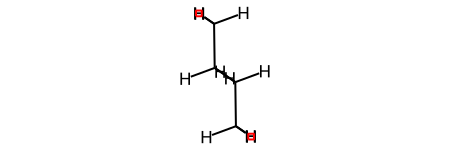

In [42]:
mol.to_rdkit()

mol.rdmol

The aemol object and obtain both the rdkit and openbabel representation with:

- `mol.rdmol`
- `mol.obmol`